# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Load data

In [2]:
categorical_columns = ['maker', 'color', 'body_type', 'gearbox', 'fuel_type']
categorical_dtypes = {col: 'category' for col in categorical_columns}

cars = pd.read_csv('../data/processed_capstone_data.csv', index_col='adv_id', dtype=categorical_dtypes)
cars

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_1$$1,Bentley,Arnage,10_1,2018,4,Silver,2000,Saloon,60000.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$10,Bentley,Arnage,10_1,2017,11,Silver,2003,Saloon,38000.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$11,Bentley,Arnage,10_1,2018,3,Green,2003,Saloon,69491.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$12,Bentley,Arnage,10_1,2018,6,Silver,2002,Saloon,52000.0,6.8,...,450.0,315.0,3116.0,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0
10_1$$13,Bentley,Arnage,10_1,2018,4,Silver,2000,Saloon,53444.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97_1$$1,Westfield,Sport,97_1,2018,5,Yellow,2006,Convertible,1800.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
97_1$$2,Westfield,Sport,97_1,2018,5,Yellow,2006,Convertible,2009.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
99_1$$1,Zenos,E10,99_1,2018,3,Red,2016,Convertible,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


# Visualizations

In [3]:
cars['log_price'] = np.log10(cars['price'])

## Numerical

- `reg_year`
- `engine_power`
- `run_miles`

### reg_year

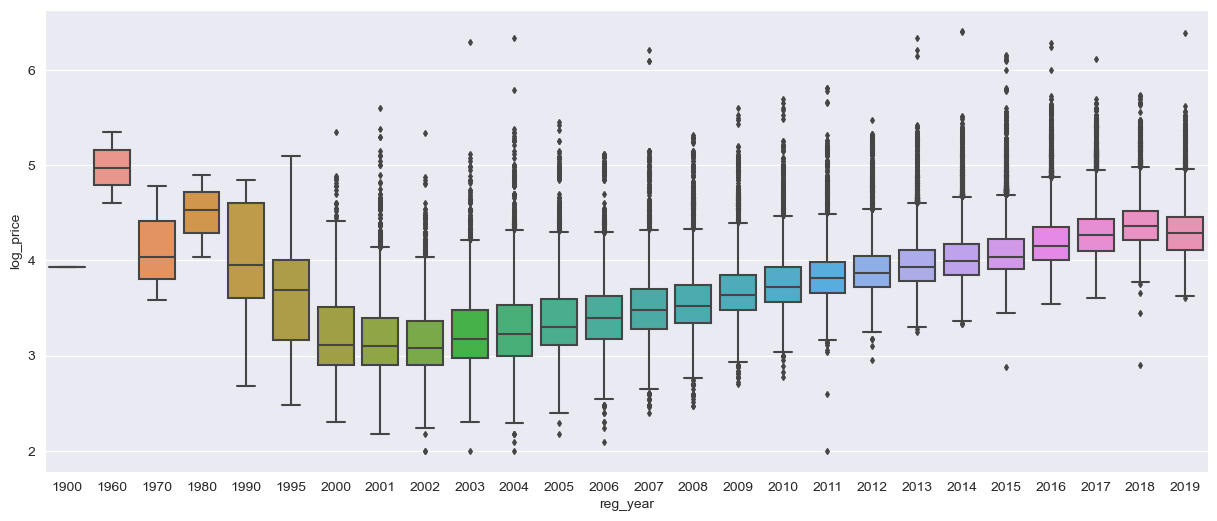

In [4]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cars, x='reg_year', y='log_price', fliersize=3)
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.show()

### engine_power

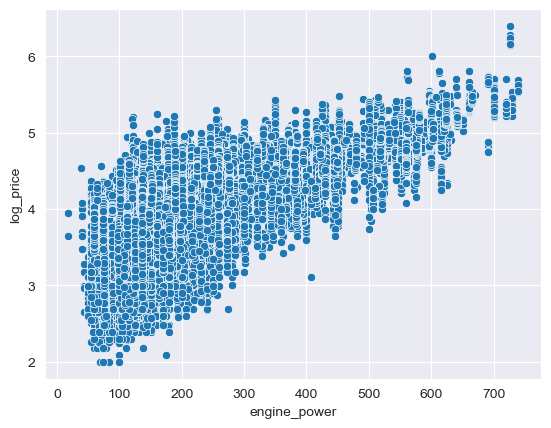

In [5]:
sns.scatterplot(data=cars, x='engine_power', y='log_price')
plt.show()

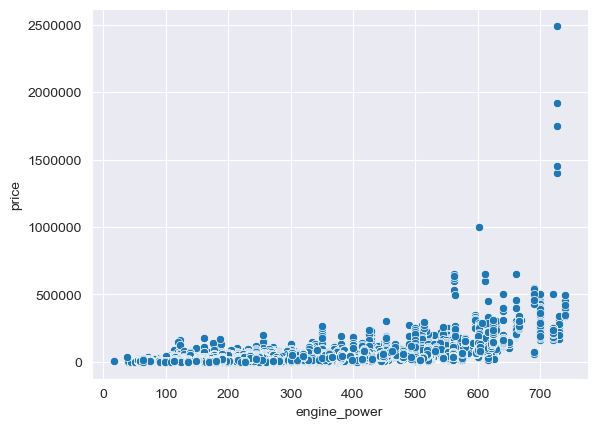

In [6]:
sns.scatterplot(data=cars, x='engine_power', y='price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

### run_miles

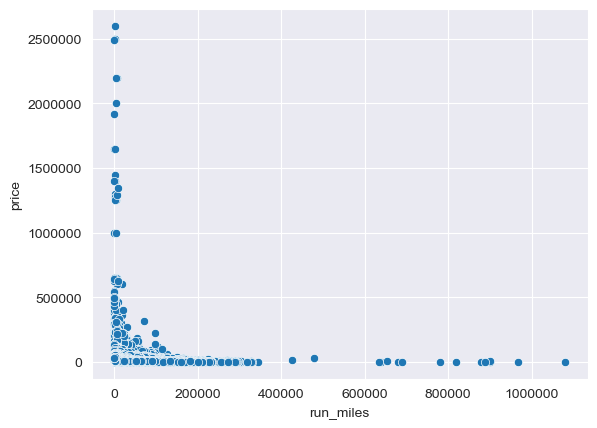

In [7]:
sns.scatterplot(data=cars, x='run_miles', y='price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

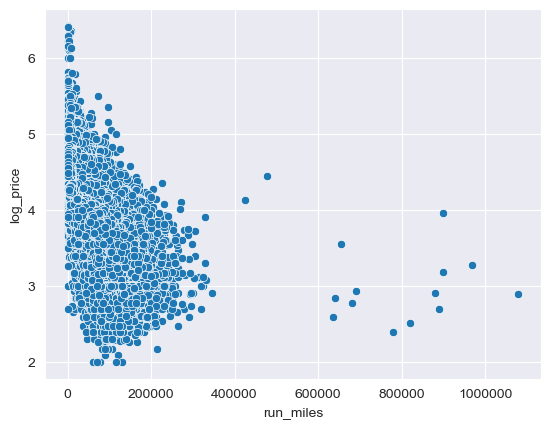

In [8]:
sns.scatterplot(data=cars, x='run_miles', y='log_price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

## Categorical

### gearbox

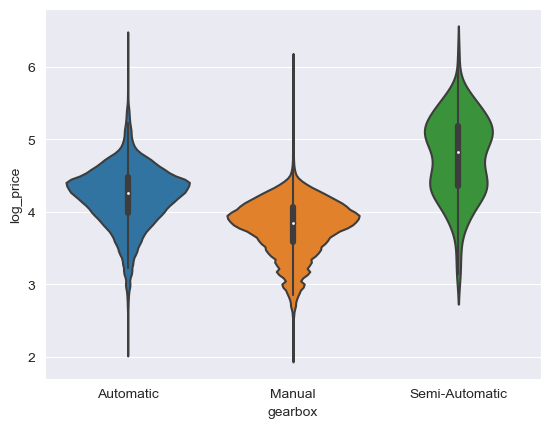

In [9]:
sns.violinplot(data=cars, x='gearbox', y='log_price')
plt.show()

### body_type

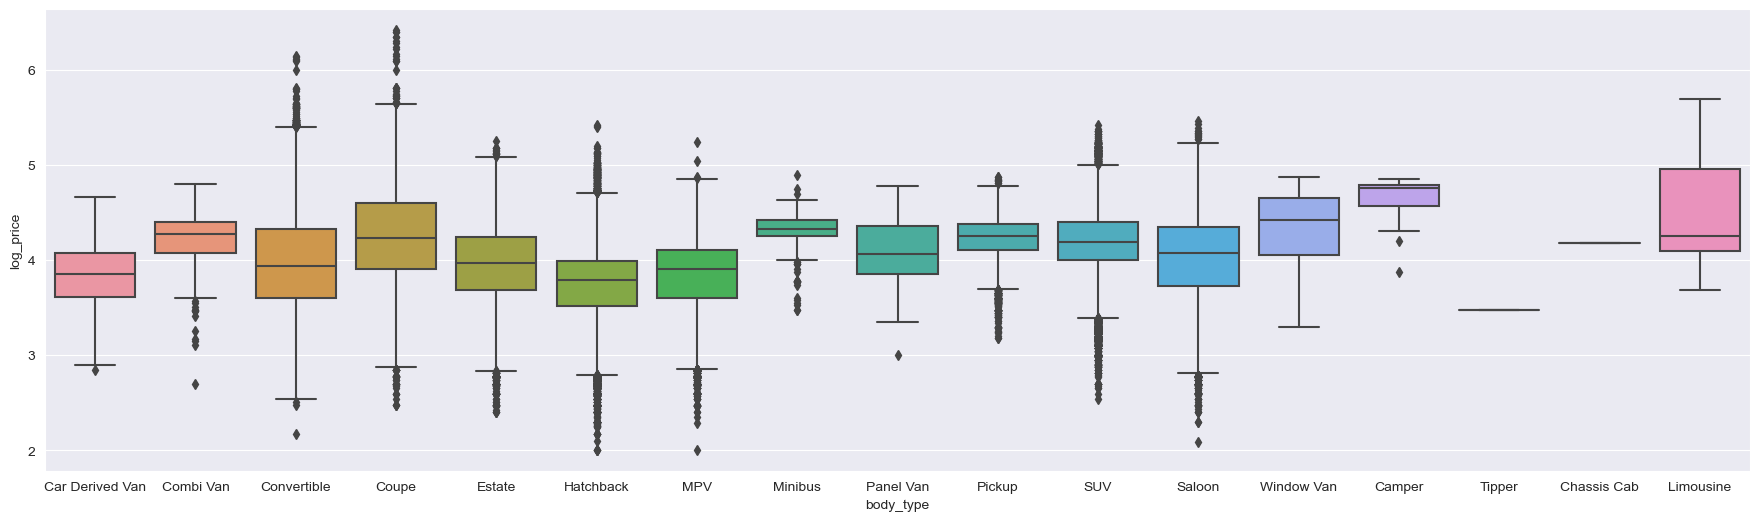

In [10]:
body_type_order = cars['body_type'].sort_values().dropna().unique().tolist()

plt.figure(figsize=(22,6))
sns.boxplot(data=cars, x='body_type', y='log_price', order=body_type_order)
plt.show()


### fuel_type

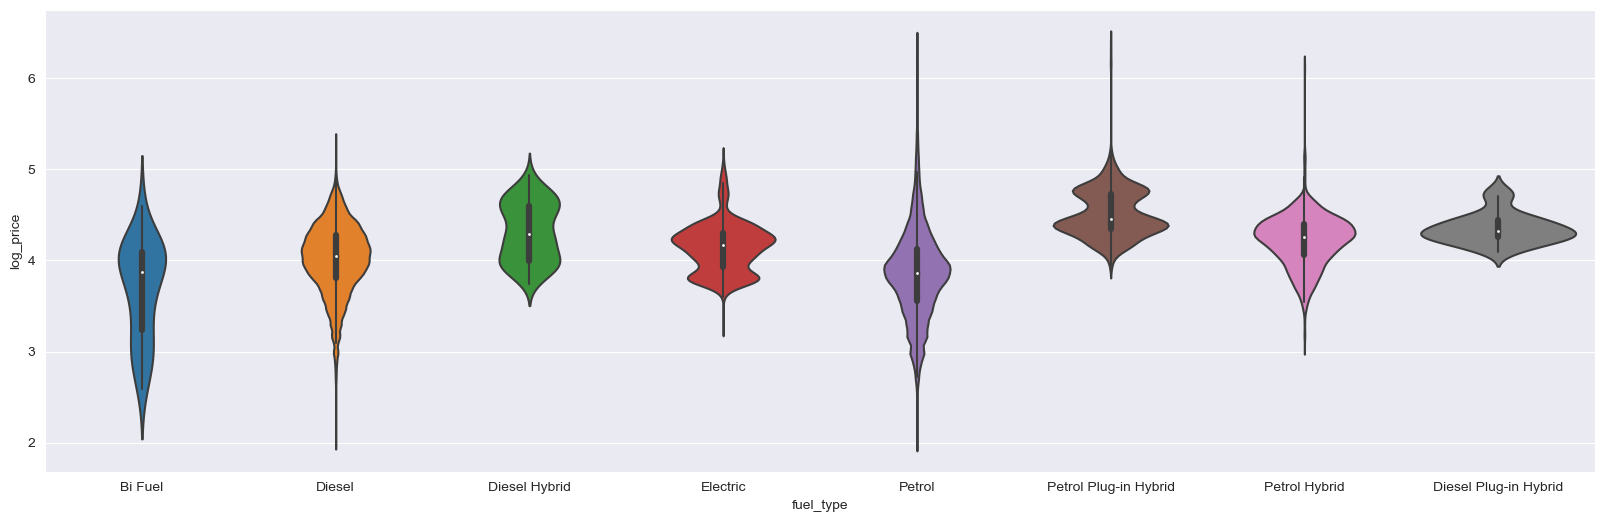

In [11]:
plt.figure(figsize=(20,6))
sns.violinplot(data=cars, x='fuel_type', y='log_price')
plt.show()

### maker

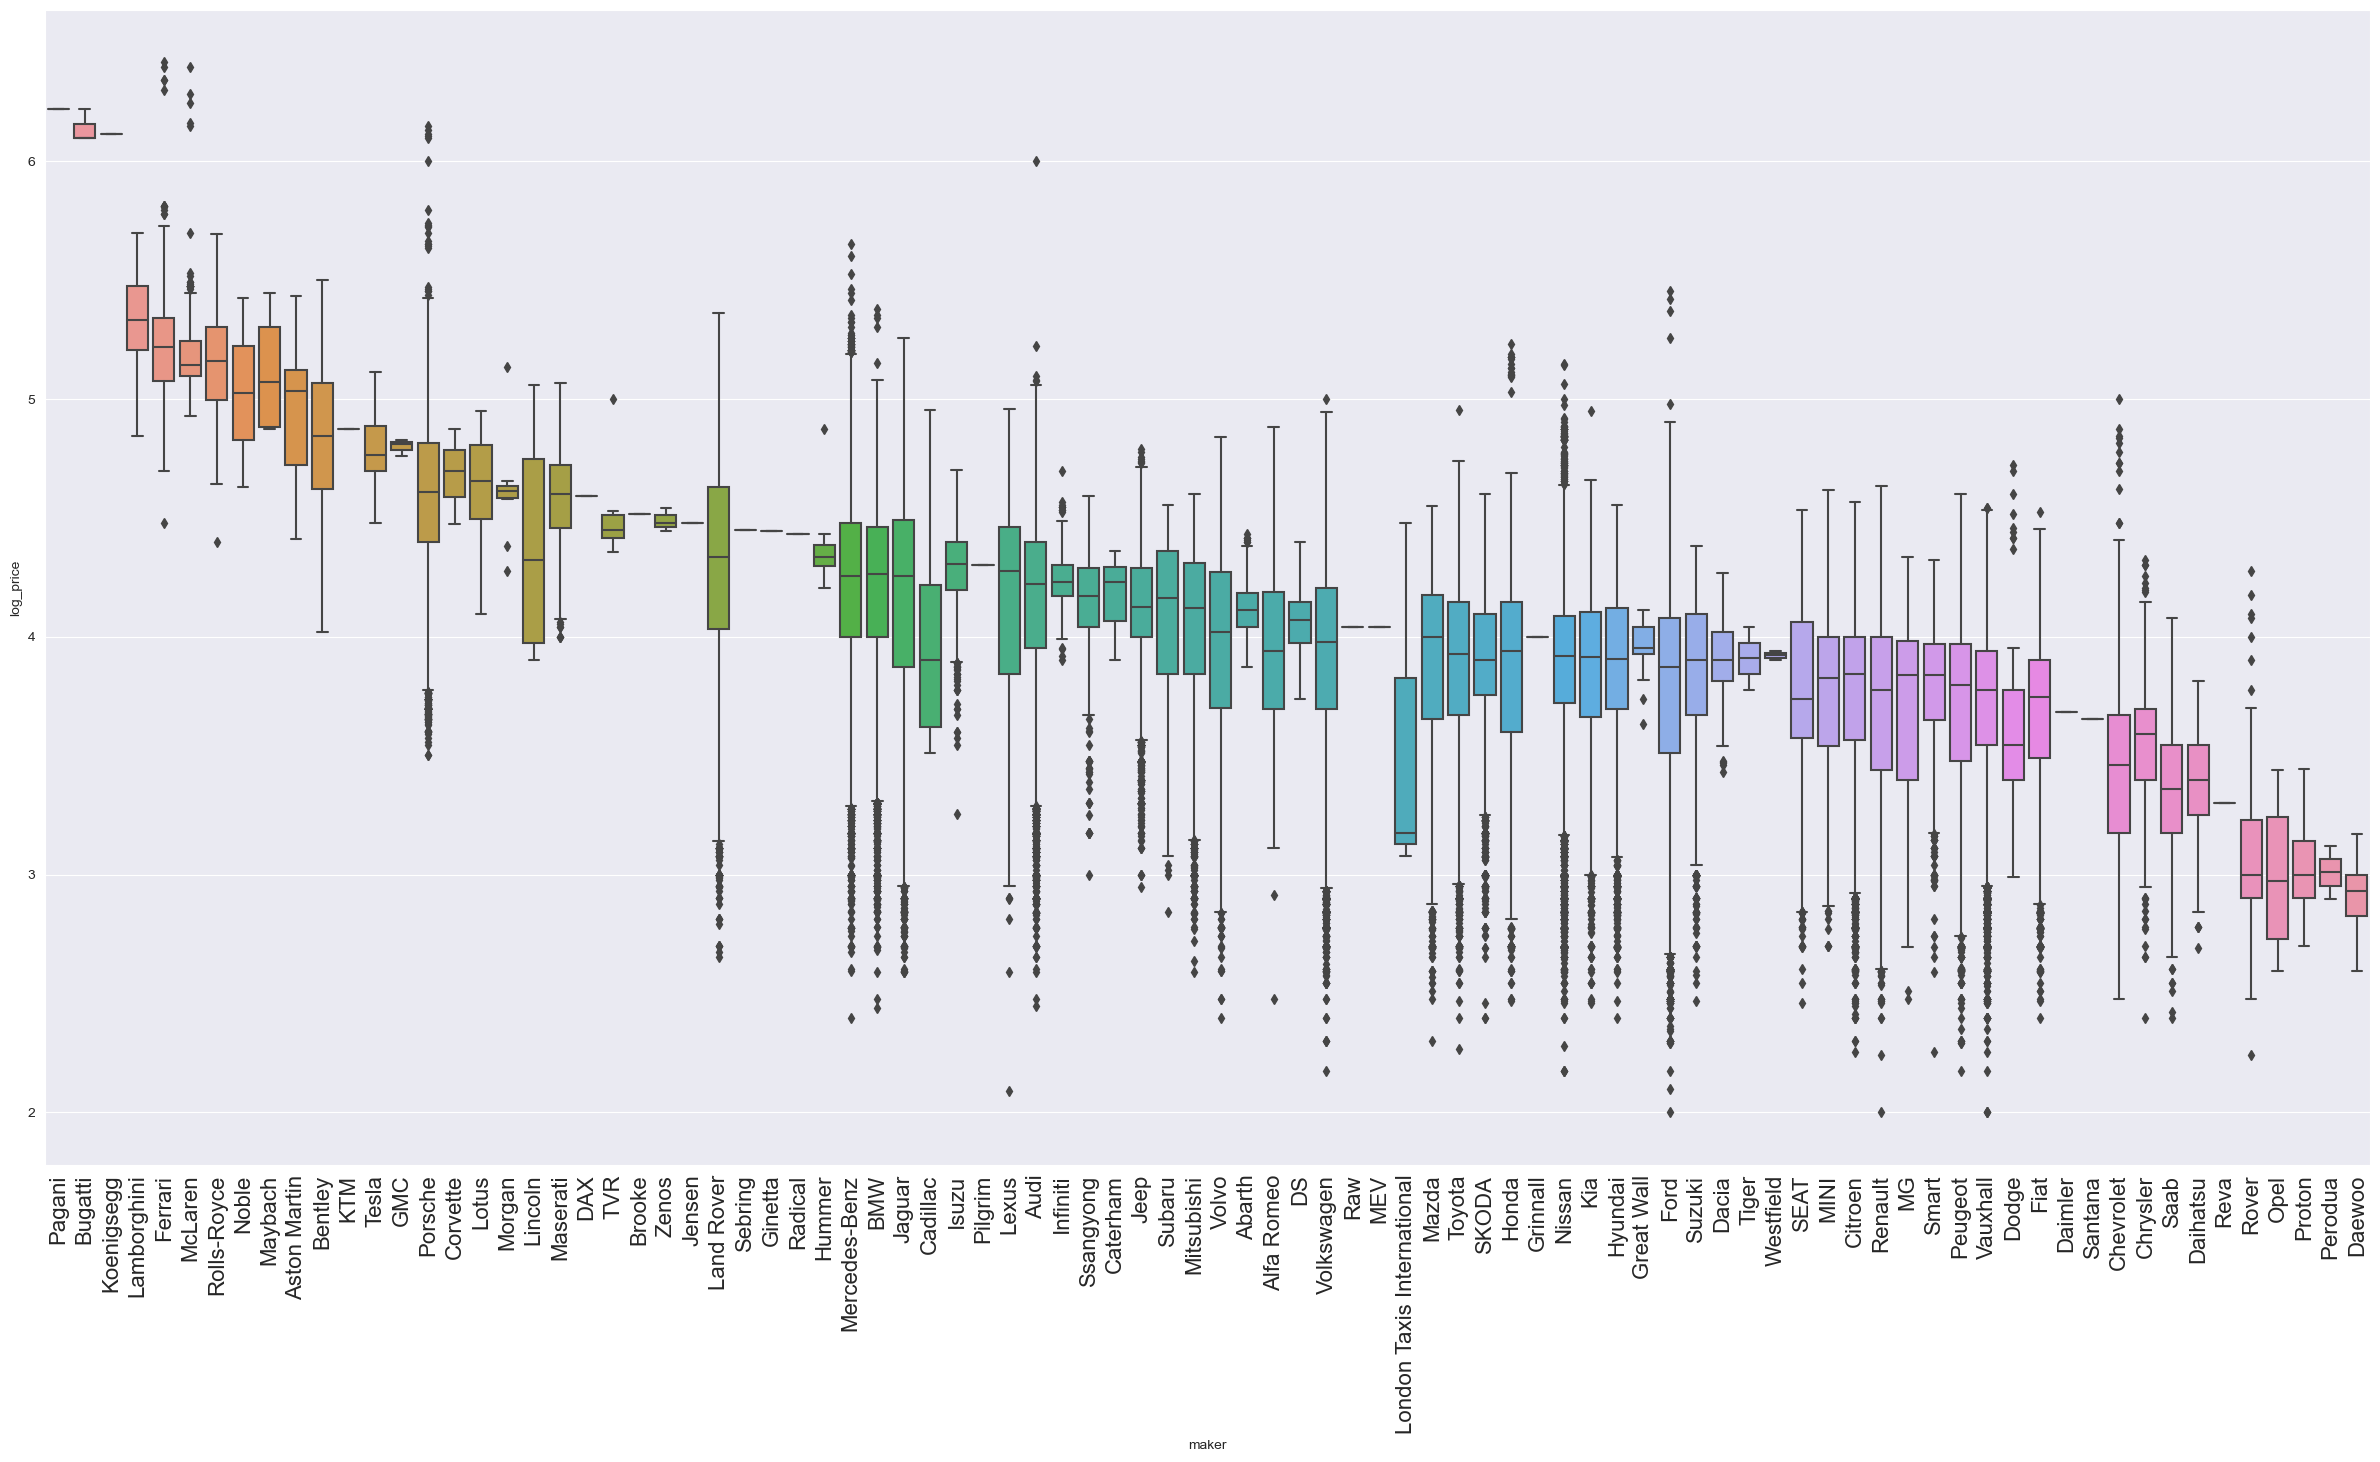

In [12]:
order_list = cars.groupby('maker')['price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(30, 15))
sns.boxplot(data=cars, x='maker', y='log_price', order=order_list)
plt.xticks(rotation=90, fontsize=16)
plt.show()

# Bonus

In [13]:
cheap_cars = cars[cars['price'] < 50000]
expensive_cars = cars[cars['price'] >= 50000]

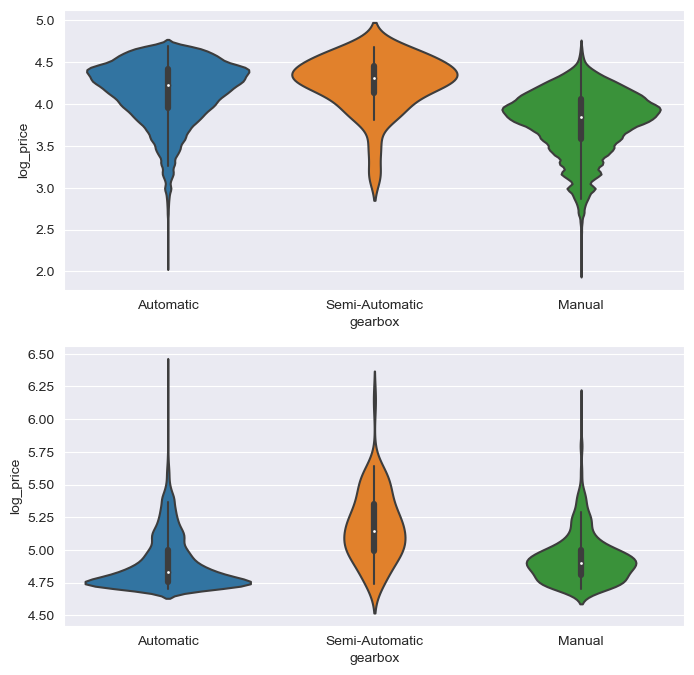

In [14]:
order_list = cars['gearbox'].dropna().unique().tolist()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.violinplot(data=cheap_cars, x='gearbox', y='log_price', order=order_list, ax=axes[0])
sns.violinplot(data=expensive_cars, x='gearbox', y='log_price', order=order_list, ax=axes[1])

plt.show()

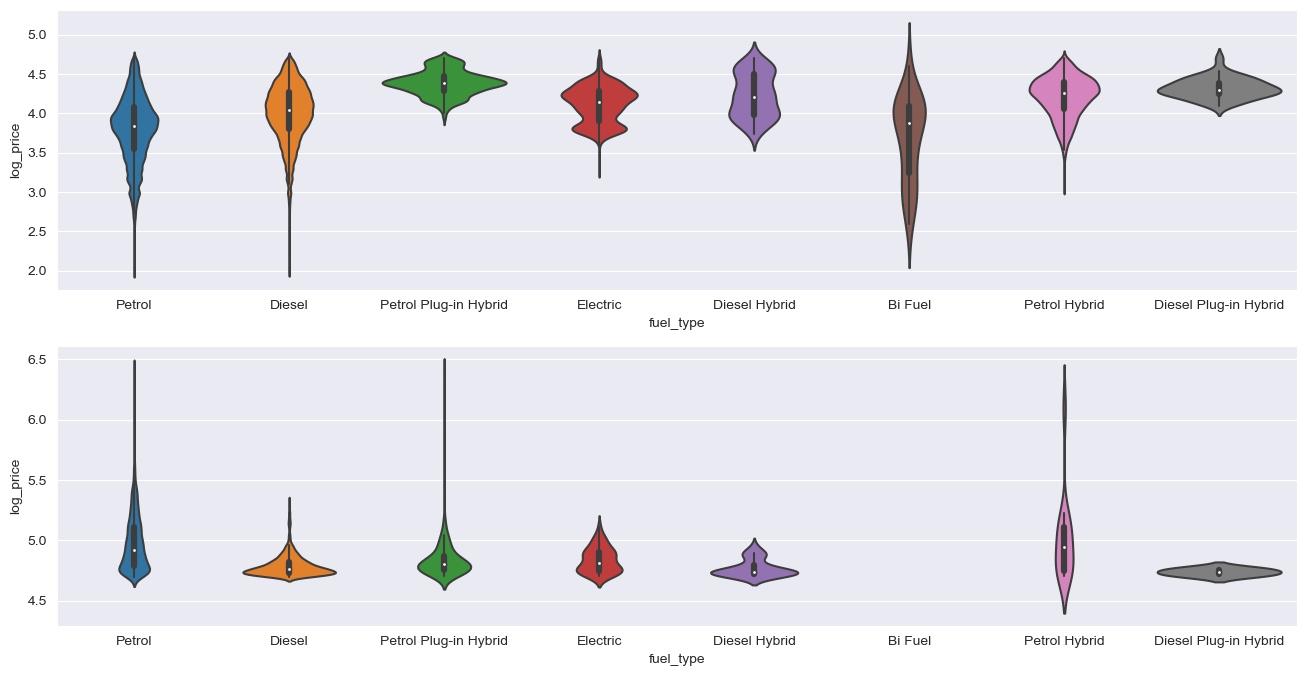

In [15]:
order_list = cars['fuel_type'].dropna().unique().tolist()

_, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.violinplot(data=cheap_cars, x='fuel_type', y='log_price', order=order_list, ax=axes[0])
sns.violinplot(data=expensive_cars, x='fuel_type', y='log_price', order=order_list, ax=axes[1])

plt.show()

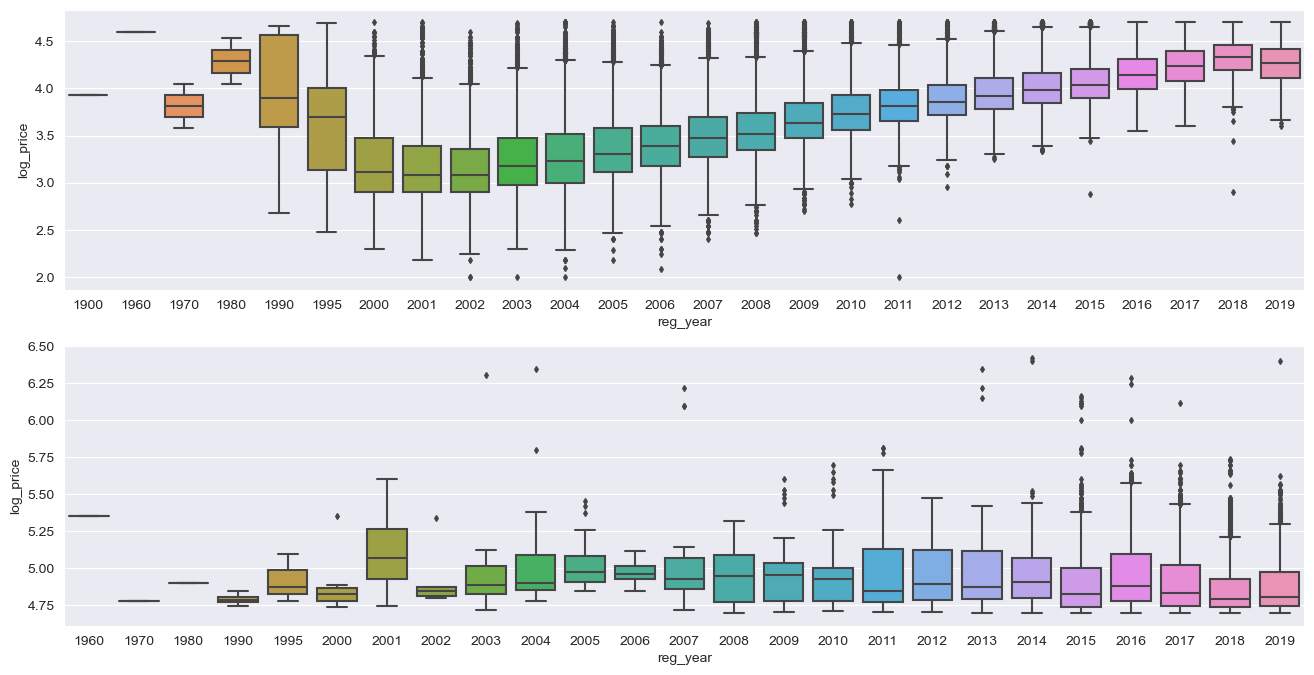

In [16]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.boxplot(data=cheap_cars, x='reg_year', y='log_price', fliersize=3, ax=axes[0])
sns.boxplot(data=expensive_cars, x='reg_year', y='log_price', fliersize=3, ax=axes[1])

plt.show()

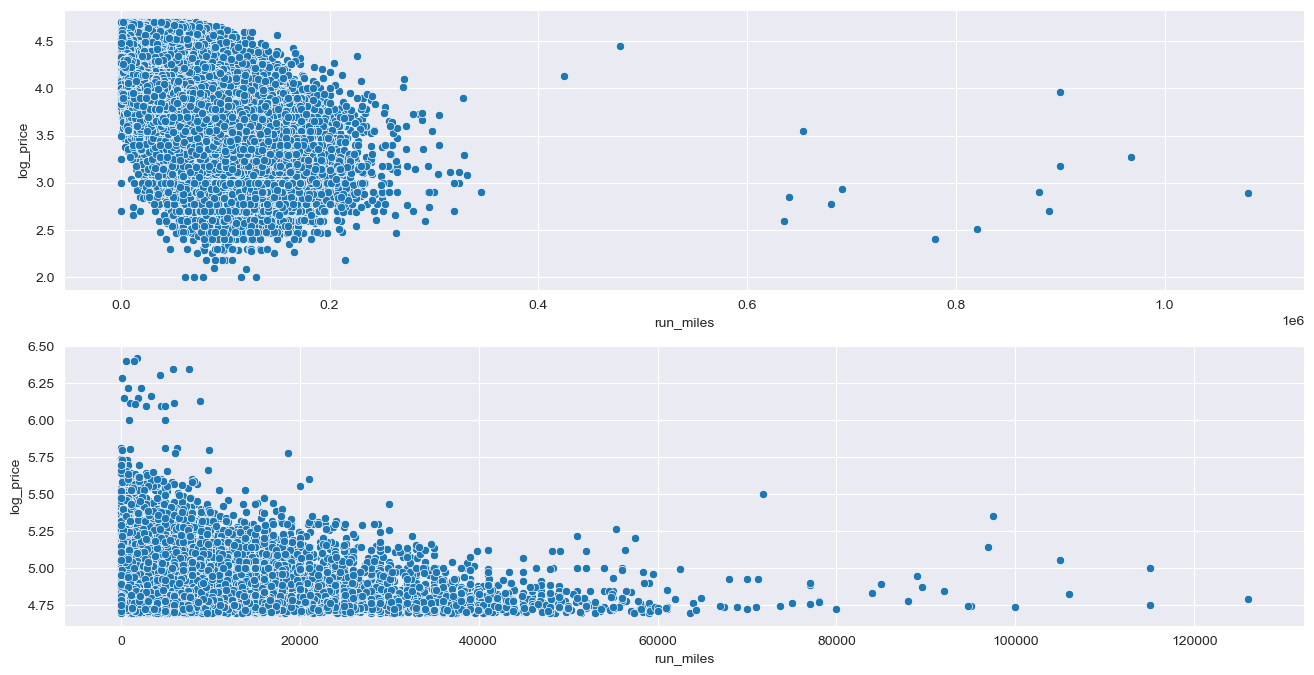

In [17]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.scatterplot(data=cheap_cars, x='run_miles', y='log_price', ax=axes[0])
sns.scatterplot(data=expensive_cars, x='run_miles', y='log_price', ax=axes[1])

plt.show()

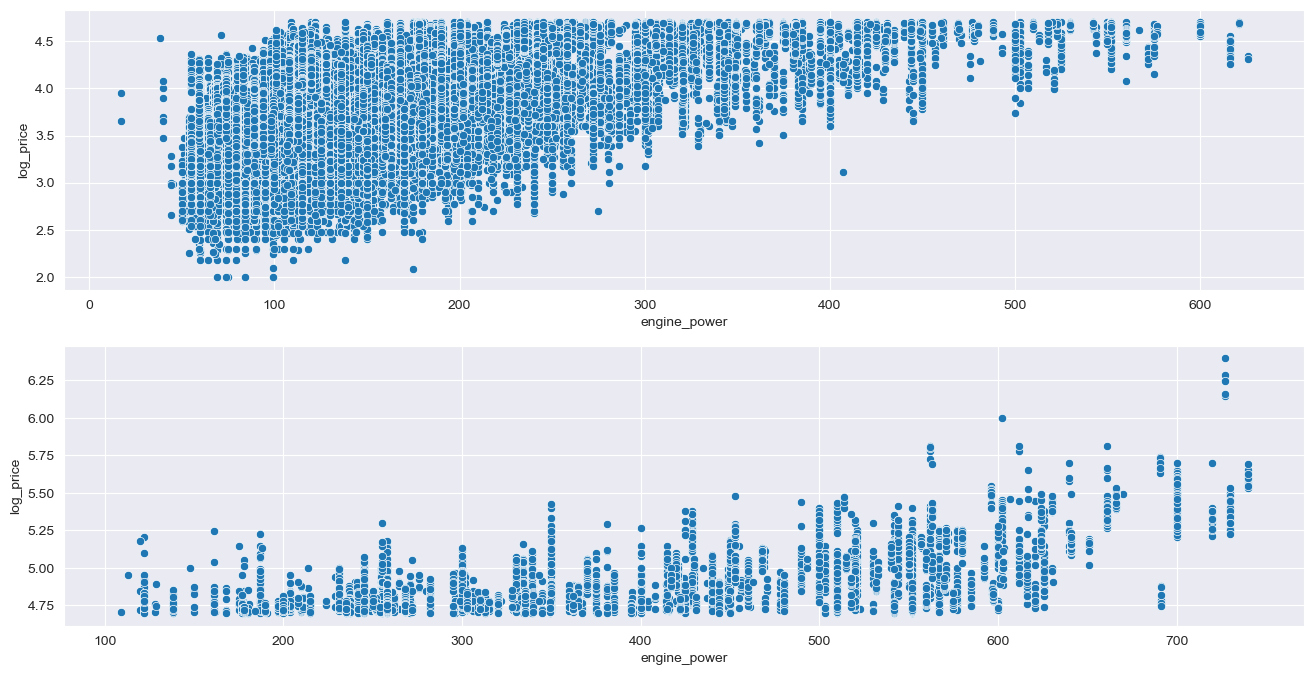

In [18]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.scatterplot(data=cheap_cars, x='engine_power', y='log_price', ax=axes[0])
sns.scatterplot(data=expensive_cars, x='engine_power', y='log_price', ax=axes[1])

plt.show()